<h1>Prepoznavnje oblika- domaći 1</h1>
<h2>Chengdu database</h2>




In [1]:
#Učitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# <h3>Učitavanje podataka</h3>

In [2]:
#Učitavanje baze u DataFrame
df=pd.read_csv('ChengduPM20100101_20151231.csv')

#Ispis prvih 5 vrsta
df.head()


,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.00,81.20,1022.00,7.00,cv,1.00,0.00,0.00
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.00,86.99,1022.00,6.00,cv,1.00,0.00,0.00
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.00,86.99,1021.00,6.00,cv,1.00,0.00,0.00
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.00,86.89,1021.00,5.00,cv,1.00,0.00,0.00
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.00,86.79,1021.00,4.00,cv,1.00,0.00,0.00


# <h3>Pregled podataka-uzorci i obilježja</h3>

In [3]:
#Ispis broja uzoraka i broja obilježja
print("Broj uzoraka:",df.shape[0],"\n")
print("Broj obilježja:",df.shape[1],"\n")
#Tipovi podataka svakog obilježja
df.dtypes


Broj uzoraka: 52584 

Broj obilježja: 17 



No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_Caotangsi     float64
PM_Shahepu       float64
PM_US Post       float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object

-DataFrame sadrzi 52584 uzorka i 17 obilježja. <br>
-Svaki uzorak predstavlja koncentraciju PM2.5 čestica i vrijednosti drugih vremenskih obilježja svakog sata<br> 
-Numerička obilježja su:
  <u>PM_Caotangsi,PM_Shahepu,PM_US Post, DEWP, HUMI, PRES,TEMP,lws,precipitation, Iprec</u><br>
-Kategoricka obiljezja su:<u> No,year,month,day,hour,season,cbwd</u>

In [4]:
#izbacivanje obilježja No,PM_Caotangsi i PM_Shahepu 
df.drop(['No','PM_Caotangsi','PM_Shahepu'],inplace=True,axis=1)
df



,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,4.00,81.20,1022.00,7.00,cv,1.00,0.00,0.00
1,2010,1,1,1,4,NaN,4.00,86.99,1022.00,6.00,cv,1.00,0.00,0.00
2,2010,1,1,2,4,NaN,4.00,86.99,1021.00,6.00,cv,1.00,0.00,0.00
3,2010,1,1,3,4,NaN,3.00,86.89,1021.00,5.00,cv,1.00,0.00,0.00
4,2010,1,1,4,4,NaN,2.00,86.79,1021.00,4.00,cv,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,4,262.00,7.00,87.28,1027.00,9.00,NW,2.00,0.00,0.00
52580,2015,12,31,20,4,218.00,7.00,87.28,1028.00,9.00,NW,4.00,0.00,0.00
52581,2015,12,31,21,4,213.00,7.00,87.28,1028.00,9.00,cv,1.00,0.00,0.00
52582,2015,12,31,22,4,236.00,7.00,93.40,1028.00,8.00,NW,2.00,0.00,0.00


-Prema zadatku izbačena su obilježja:<u> PM_Caotangsi i PM_Shahepu</u><br>
-Obilježje <u> No</u> predstavlja redni broj uzorka i on nije potreban tokom analize podataka pa je i on izbačen.<br>


## <h3>Nedostajući podaci</h3>

In [5]:
#definisanje funkcije koja ispisuje broj nedostajucih vrijednosti(i u procentima)
def isNan(data):
    null=data.isnull().sum().sort_values(ascending=False)
    print("Nedostajući podaci po svakom obilježju:\n",null,"\n")
    #prikazano u procentima
    pr=(data.isnull().sum()/len(df)*100).sort_values(ascending=False)
    print("Nedostajući podaci u procentima po svakom obilježju:\n",pr,"\n")
    
isNan(df)

Nedostajući podaci po svakom obilježju:
 PM_US Post       23684
precipitation     2955
Iprec             2955
HUMI               535
Iws                533
DEWP               529
TEMP               527
PRES               521
cbwd               521
year                 0
month                0
day                  0
hour                 0
season               0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 PM_US Post      45.04
precipitation    5.62
Iprec            5.62
HUMI             1.02
Iws              1.01
DEWP             1.01
TEMP             1.00
PRES             0.99
cbwd             0.99
year             0.00
month            0.00
day              0.00
hour             0.00
season           0.00
dtype: float64 



-Nedostajuće vrijednosti se javljaju kod svih obilježja osim: year,month,day,hour,season<br>
-Najveći broj nedostajućih vrijednosti je u obilježju <u>PM_US Post  i to čak 45%</u>. 
-S obzirom da PM_US Post tj PM2.5 predstavlja glavno obilježje koje treba da se analizira i koje ce predtavljati izlaz regresije ne može se izbaciti iz baze podataka<br>
-Slijedi analiza broja nedostajućih podataka za obilježje PM_US Post tokom svake dostupne godine

In [6]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [7]:
for i in range(2010, 2016):
    globals()['df%s' % i] =df[df['year']==i]
    globals()['df%sPM' % i]=globals()['df%s' % i]['PM_US Post'].isnull().sum()/df2010.shape[0]*100

Prethodno su generisani df za svaku godinu i izračunat postotak uzoraka sa vrijednosti obilježja PM_US Post null.

Postotci nedostajućih vrijdnosti za PM2.5 po godinama
100.0 %
100.0 %
49.94292237442922 %
15.901826484018263 %
3.2534246575342465 %
1.2671232876712328 %


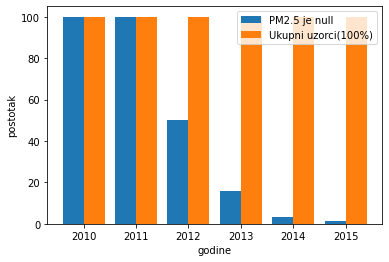

In [8]:

X = ['2010','2011','2012','2013','2014','2015']
Y = [df2010PM,df2011PM,df2012PM,df2013PM,df2014PM,df2015PM]
Z = [100,100,100,100,100,100]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'PM2.5 je null')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Ukupni uzorci(100%)')
  
plt.xticks(X_axis, X)
plt.xlabel("godine")
plt.ylabel("postotak")
plt.legend()

print("Postotci nedostajućih vrijdnosti za PM2.5 po godinama")
for i in Y:
    print(i,"%")

-Sa grafika se može uočiti da u 2010-toj i 2011-toj godini podaci za obilježje PM2.5 ne postoje tj. nisu dostupni. Za narednu godinu dostupno je oko polovine uzoraka sa unesenom konretnom vrijednošću. <br>
-S obzirom da je obilježje PM2.5 promjenjivo i cilj nam je da analiziramo kako se njegova koncentracija mijenjala kroz godine, ne bi bilo u redu da se nedostajući podaci prepišu na osnovu vrijednosti u drugom godinama, pogotovo za 2011 i 2012. godinu koje bi trebale cijele da se popune.<br>
-Također u pitanju je previše podataka koji su uzastopni pa ni popunjavanje sa medijanom ili prepisivanje prethpdne ili naredne dostupne vrijednsoti se ne čini u redu jer može da unese jako veliku grešku, pogotovo u daljnoj analizi i prilikom obučavanja modela i testiranja istog.<br>
-Zaključak je da se<u> uzorci sa više od 10% null vrijednosti za PM2.5 trebaju izbaciti</u>, a tu pripadaju uzorci iz 2010. ,2011. ,2012. i 2013. godine

-Pošto se vrijdnosti PM2.5 obilježja ne mijenjaju drastično iz sata u sat, nedostajuće vrijednosti za 2014. i 2015. godinu će biti popunjene sa prethodno poznatim vrijednostima.

In [9]:
#popunjavanje vrijednsoti PM2.5 za 2014. i 2015. godinu nad dijelovima 
df2014['PM_US Post'].fillna(method='ffill',inplace=True)
df2015['PM_US Post'].fillna(method='ffill',inplace=True)


C:\Users\nata1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
#kopiranje popunjenih vrijednsoti u originalni dataFrame
df[df['year']==2014]=df2014
df[df['year']==2015]=df2015

In [11]:
isNan(df)

Nedostajući podaci po svakom obilježju:
 PM_US Post       23288
precipitation     2955
Iprec             2955
HUMI               535
Iws                533
DEWP               529
TEMP               527
PRES               521
cbwd               521
year                 0
month                0
day                  0
hour                 0
season               0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 PM_US Post      44.29
precipitation    5.62
Iprec            5.62
HUMI             1.02
Iws              1.01
DEWP             1.01
TEMP             1.00
PRES             0.99
cbwd             0.99
year             0.00
month            0.00
day              0.00
hour             0.00
season           0.00
dtype: float64 



-Nakon što su popunjene vrijednosti za uzorke u 2014. i 2015.godini (njih 396), treba da se izbace uzorci iz preostalih godina gdje je obilježje PM_US Post ostalo nedostajuće

In [12]:
#brisanje uzoraka gdje je PM2.5 null
df.dropna(axis=0, how='all', inplace=True,subset=['PM_US Post'])
df.head(20)


,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
20750,2012,5,14,14,1,46.00,4.00,24.24,1013.90,26.00,cv,2.00,0.00,0.00
21263,2012,6,4,23,2,69.00,18.00,88.28,1008.10,20.00,cv,4.00,0.00,0.00
21279,2012,6,5,15,2,98.00,19.00,88.37,1004.10,21.00,cv,4.00,0.00,0.00
21280,2012,6,5,16,2,89.00,20.00,83.25,1003.10,23.00,cv,4.00,0.00,0.00
21281,2012,6,5,17,2,66.00,18.00,73.50,1003.10,23.00,NE,2.00,0.00,0.00
21282,2012,6,5,18,2,86.00,18.00,69.20,1003.10,24.00,NE,4.00,0.00,0.00
21283,2012,6,5,19,2,80.00,19.00,78.24,1004.10,23.00,NE,7.00,0.00,0.00
21284,2012,6,5,20,2,73.00,18.00,73.50,1004.10,23.00,NE,9.00,0.00,0.00
21285,2012,6,5,21,2,84.00,18.00,78.09,1005.10,22.00,NE,12.00,0.00,0.00
21286,2012,6,5,22,2,75.00,18.00,78.09,1006.10,22.00,cv,2.00,0.00,0.00


-Nakon izbacivanja uzoraka koji su imali nedostajuće vrijednosti PM2.5 čestica,odstranjeno je 23 288(44.29%) uzoraka što je skoro pola baze podatka.

In [13]:
print("Nove dimenzije:",df.shape)

isNan(df)


Nove dimenzije: (29296, 14)
Nedostajući podaci po svakom obilježju:
 precipitation    1224
Iprec            1224
Iws               498
HUMI              493
DEWP              490
TEMP              489
PRES              486
cbwd              486
year                0
month               0
day                 0
hour                0
season              0
PM_US Post          0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 precipitation   4.18
Iprec           4.18
Iws             1.70
HUMI            1.68
DEWP            1.67
TEMP            1.67
PRES            1.66
cbwd            1.66
year            0.00
month           0.00
day             0.00
hour            0.00
season          0.00
PM_US Post      0.00
dtype: float64 



-Nakon što je riješeno pitanje null vrijednosti za PM2.5, potrebno je analizirati na koji način će se ostali nedostajući podaci riješiti

-Primjećeno je da za neke uzorke su sve vrijednosti obilježja: DEWP, HUMI, PRES, TEMP, cbwd, Iws nedostajuće istovremeno<br>
-Ti uzorci će biti izbačeni


In [14]:

df.dropna(axis=0, how='all', inplace=True,subset=['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws'])

In [15]:
isNan(df)


Nedostajući podaci po svakom obilježju:
 precipitation    1223
Iprec            1223
Iws                12
HUMI                7
DEWP                4
TEMP                3
year                0
month               0
day                 0
hour                0
season              0
PM_US Post          0
PRES                0
cbwd                0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 precipitation   4.25
Iprec           4.25
Iws             0.04
HUMI            0.02
DEWP            0.01
TEMP            0.01
year            0.00
month           0.00
day             0.00
hour            0.00
season          0.00
PM_US Post      0.00
PRES            0.00
cbwd            0.00
dtype: float64 



-Nedostajućih vrijednosti za obilježja DEWP,HUMI,Iws i precipitation ima jako malo (manje od 1%)<br>
-Pošto se vrijednosti datih obilježja ne razlikuju mnogo po susjednim uzorcima,što je i prirodno da se vremenske prilike ponašaju slično iz sata u sat,<u> data obilježja biće dopunjena sa podacima,a neće biti izbačena</u><br>
-Metoda dopunjavanja je <u>prepisivanje prve poznate vrijednosti ispred.</u><br>
-Za dopunjavanje nije korištena srednja vrijednost ili medijana iz razloga navedenih iznad.
<br>-Obilježje precipitation ima 4.25% nedostajućih vrijednsoti ali če biti dopunjeno kao i prethodno pobrojani iz istih razloga


In [16]:
df['DEWP'].fillna(method='ffill',inplace=True)
df['HUMI'].fillna(method='ffill',inplace=True)
df['TEMP'].fillna(method='ffill',inplace=True)
df['Iws'].fillna(method='ffill',inplace=True)
df['precipitation'].fillna(method='ffill',inplace=True)



In [17]:
isNan(df)

Nedostajući podaci po svakom obilježju:
 Iprec            1223
year                0
month               0
day                 0
hour                0
season              0
PM_US Post          0
DEWP                0
HUMI                0
PRES                0
TEMP                0
cbwd                0
Iws                 0
precipitation       0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 Iprec           4.25
year            0.00
month           0.00
day             0.00
hour            0.00
season          0.00
PM_US Post      0.00
DEWP            0.00
HUMI            0.00
PRES            0.00
TEMP            0.00
cbwd            0.00
Iws             0.00
precipitation   0.00
dtype: float64 



-Jedino obilježje koje je sada ostalo sa nedostajućim vrijednostima jeste ukupna količina padavine.<br>
-Ona ne može da se popuni prepisivanjem prethdne vrijednosti jer zavisi od količine padavina tog sata koji je tek popunjen i ukupne količine do tog sata.<br>
-Ako je vrijednost obilježja precipitation 0, to znači da toga sata nema padavina i Iprec se resetuje na 0.

In [18]:
#indeksi gdje je vrijednost Iprec null
df.reset_index(inplace=True)
ind=df.loc[df['Iprec'].isnull()].index
print(ind)
  

Int64Index([  136,   137,   138,   139,   140,   141,   142,   143,   144,
              145,
            ...
            28565, 28566, 28567, 28568, 28576, 28577, 28578, 28579, 28634,
            28645],
           dtype='int64', length=1223)


In [19]:
df

,index,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,20750,2012,5,14,14,1,46.00,4.00,24.24,1013.90,26.00,cv,2.00,0.00,0.00
1,21263,2012,6,4,23,2,69.00,18.00,88.28,1008.10,20.00,cv,4.00,0.00,0.00
2,21279,2012,6,5,15,2,98.00,19.00,88.37,1004.10,21.00,cv,4.00,0.00,0.00
3,21280,2012,6,5,16,2,89.00,20.00,83.25,1003.10,23.00,cv,4.00,0.00,0.00
4,21281,2012,6,5,17,2,66.00,18.00,73.50,1003.10,23.00,NE,2.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,52579,2015,12,31,19,4,262.00,7.00,87.28,1027.00,9.00,NW,2.00,0.00,0.00
28806,52580,2015,12,31,20,4,218.00,7.00,87.28,1028.00,9.00,NW,4.00,0.00,0.00
28807,52581,2015,12,31,21,4,213.00,7.00,87.28,1028.00,9.00,cv,1.00,0.00,0.00
28808,52582,2015,12,31,22,4,236.00,7.00,93.40,1028.00,8.00,NW,2.00,0.00,0.00


In [20]:
#na mjestima gdje su null vrijednosti za ukupnu količinu padavina treba da se sabere prethodna ukupna vrijednost sa padavinom tog sata,
#osim ako nije bilo padavine tog sata pa se suma resetuje.

for i in ind:
    if df['precipitation'].iloc[i]==0:
        v=0
    else:
         v=df.iloc[i,-2]+df.iloc[i-1,-1]
    df.iloc[i,-1]=v
    

In [21]:
#izbacujem kolonu sa starim indeksima
df.drop(['index'], inplace= True, axis = 1)

In [22]:
isNan(df)
df.head()

Nedostajući podaci po svakom obilježju:
 year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64 

Nedostajući podaci u procentima po svakom obilježju:
 year            0.00
month           0.00
day             0.00
hour            0.00
season          0.00
PM_US Post      0.00
DEWP            0.00
HUMI            0.00
PRES            0.00
TEMP            0.00
cbwd            0.00
Iws             0.00
precipitation   0.00
Iprec           0.00
dtype: float64 



,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.00,4.00,24.24,1013.90,26.00,cv,2.00,0.00,0.00
1,2012,6,4,23,2,69.00,18.00,88.28,1008.10,20.00,cv,4.00,0.00,0.00
2,2012,6,5,15,2,98.00,19.00,88.37,1004.10,21.00,cv,4.00,0.00,0.00
3,2012,6,5,16,2,89.00,20.00,83.25,1003.10,23.00,cv,4.00,0.00,0.00
4,2012,6,5,17,2,66.00,18.00,73.50,1003.10,23.00,NE,2.00,0.00,0.00


-<u>Sve nedostajuće vrijednosti su riješene</u><br>
-Potrebno je provjeriti kakve su statističke karaktristike svakog obilježja i da li ima nelogičnih vrijednsoti kao i nekih vrijednosti koje nisu inicijalno null ali bi to mogle da znače, ali prije toga se trebaju obraditi kategorička obilježja sa nenumeričkim vrijednostima

In [23]:
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.00,4.00,24.24,1013.90,26.00,cv,2.00,0.00,0.00
1,2012,6,4,23,2,69.00,18.00,88.28,1008.10,20.00,cv,4.00,0.00,0.00
2,2012,6,5,15,2,98.00,19.00,88.37,1004.10,21.00,cv,4.00,0.00,0.00
3,2012,6,5,16,2,89.00,20.00,83.25,1003.10,23.00,cv,4.00,0.00,0.00
4,2012,6,5,17,2,66.00,18.00,73.50,1003.10,23.00,NE,2.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,2015,12,31,19,4,262.00,7.00,87.28,1027.00,9.00,NW,2.00,0.00,0.00
28806,2015,12,31,20,4,218.00,7.00,87.28,1028.00,9.00,NW,4.00,0.00,0.00
28807,2015,12,31,21,4,213.00,7.00,87.28,1028.00,9.00,cv,1.00,0.00,0.00
28808,2015,12,31,22,4,236.00,7.00,93.40,1028.00,8.00,NW,2.00,0.00,0.00


<h5>Pretvaranje kategoričkih vrijednosti u numeričke </h5>

In [24]:
#kakve kombinacije pravca vjetra postoje
df['cbwd'].unique()

array(['cv', 'NE', 'SW', 'NW', 'SE'], dtype=object)

-Pravac vjetra(cbwd) je kategoričko obilježje i treba mu dodijeliti numeričke vrijednosti. <br>
-Pošto pravac ne predstavlja neki poredak, pitanje je koliko bi bilo dobro te vrijednosti zamijeniti sa brojevima od 0,1,2 pa na dalje.<br>
-S obzirom da je pravac dat putem strana svijeta to se može zamisliti kao koordinatni sistem i<u> određeni pravac označiti uglom.</u><br>
-Problem kod tog pristupa je vrijednost <u>cv </u>koja ukazuje da je vjetar duvao promjenjivo ili jako mirno pa se tačan pravac nije mogao odrediti.<br>


In [25]:
#pretvaranje kategorickih u numericke, gdje je cv 360, a sjever je 0
df['cbwd'] = df['cbwd'].replace('cv',360)
df['cbwd']=df['cbwd'].replace('NE',45)
df['cbwd']=df['cbwd'].replace('SE',135)
df['cbwd']=df['cbwd'].replace('SW',225)
df['cbwd']=df['cbwd'].replace('NW',315)
df.head()



,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.00,4.00,24.24,1013.90,26.00,360,2.00,0.00,0.00
1,2012,6,4,23,2,69.00,18.00,88.28,1008.10,20.00,360,4.00,0.00,0.00
2,2012,6,5,15,2,98.00,19.00,88.37,1004.10,21.00,360,4.00,0.00,0.00
3,2012,6,5,16,2,89.00,20.00,83.25,1003.10,23.00,360,4.00,0.00,0.00
4,2012,6,5,17,2,66.00,18.00,73.50,1003.10,23.00,45,2.00,0.00,0.00


-Vrijednosti su postale numeričke tako što se od nule mjerio pravac vjetra tj ugao pod kojim je duvao,0 stepeni je sjever a promjenjivo stanje je opisano sa 360

## <h3>Analiza obilježja</h3>

In [26]:
df.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
count,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00,28810.00
mean,2013.76,7.00,15.75,11.52,2.59,83.63,12.78,72.76,1014.52,18.35,281.33,4.30,0.11,1.84
std,1.05,3.43,8.80,6.93,1.05,57.16,7.51,18.18,8.09,7.76,103.20,6.40,1.00,11.17
min,2012.00,1.00,1.00,0.00,1.00,1.00,-16.00,12.78,991.00,-2.00,45.00,0.00,0.00,0.00
25%,2013.00,4.00,8.00,6.00,2.00,44.00,7.00,60.74,1008.00,12.00,225.00,1.00,0.00,0.00
50%,2014.00,7.00,16.00,12.00,3.00,69.00,14.00,76.35,1014.90,19.00,315.00,2.00,0.00,0.00
75%,2015.00,10.00,23.00,18.00,3.00,105.00,19.00,87.75,1021.00,24.00,360.00,5.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,4.00,688.00,28.00,100.00,1041.00,38.00,360.00,93.00,51.70,169.40


-<u>Godina, mjesec,dan, sat i sezona</u> imaju odgovarajuće i logične vrijednosti jer opsezi idu u tom intervalu kako bi se i očekivalo u realnom svijetu pa se može zaključiti da su ti podaci u redu i da nema grešaka<br>
-Za <u>koncentraciju čestica PM2.5 </u>se vidi da se medijana i srednja vrijednost dosta razlikuju.To znači da postoje autlajeri sa visokim vrijednostima koji utiču na srednju vrijednost i znatno je povećavaju.<br>
-Maksimalna vrijednost za PM2.5 se mnogo ističe u odnosu na medijanu što može značiti da je došlo do greške pri unosu



In [27]:
#provjera koliko ima vrijenosti koje su mnogo veće 
PMhuge=df.loc[df['PM_US Post'] >400,'PM_US Post'].count()
print("Procenti:",PMhuge/len(df)*100)
print("Broj:",PMhuge)
print(df.loc[df['PM_US Post'] >400,'PM_US Post'])


Procenti: 0.05553627212773343
Broj: 16
4659    409.00
5336    487.00
9786    401.00
9787    403.00
9788    436.00
9789    428.00
12019   688.00
12020   685.00
12021   549.00
12025   491.00
12026   427.00
12027   420.00
12030   433.00
12031   449.00
12032   425.00
12033   416.00
Name: PM_US Post, dtype: float64


-Prema podacima se vidi da ne postoji samo jedan autlajer, nego ih ima više.<br>
-S obzirom da se uzorci koji imaju jako velike koncentracije PM2.5 nalaze jedno do drugih moguće je da su te vrijednosti stvarne, ali trebalo bi provjeriti sa nadležnim osobama da li je u pitanju greška pri mjerenju ili unosu ili je u redu.<br>
-<u>U ovoj analizi se smatra da su vrijednosti ispravne i ne treba ih uklanjati ili mijenjati</u>

-Za obilježje<u> DEWP</u> se također uočava razlika između medijane i srednje vrijednosti, gdje se sada više autlajera nalazi sa lijeve strane i smanjuju srednju vrijednost.<Br>
-Ni za DEWP ne postoje nelogične vrijednosti jer su i min i max u granicama normale

-Obilježja<u> HUMI,PRES,TEMP </u>također zadovoljavaju uslove iz stvarnog svijeta za minimalne i maksimalne vrijednosti i nemaju izražene autlajere jer im se medijana i srednja vrijednost skoro ne razlikuju



-Veliko odstupanje maksimalne vrijednosti od medijane je kod obilježja Iws, gdje je max čak 93 m/s, ali ni ta vrijednost nije čudna jer je u pitanju kumulativna vrijednost brzine vjetra koja se sabira svaki sat za iste pravce duvanja vjetra <br>
.

In [28]:
print(df.loc[df['Iws'] >60,'Iws'])

5549    62.00
5550    68.00
5551    73.00
5552    77.00
6203    62.00
6204    69.00
6555    62.00
6556    69.00
6557    75.00
7442    61.00
7577    61.00
7578    66.00
7579    72.00
7580    79.00
7581    85.00
12181   64.00
12182   70.00
12183   76.00
12184   81.00
12185   88.00
12186   93.00
13166   61.00
13167   69.00
13168   77.00
13169   82.00
13170   86.00
25535   66.00
25536   76.00
25537   85.00
25538   85.00
25539   85.00
25540   85.00
25541   85.00
25542   85.00
25543   85.00
26100   62.00
Name: Iws, dtype: float64


-Kao što je spomenuto, brzine se povećavaju u uzastopnim uzorcima

In [29]:
print(df.loc[df['precipitation'] >10,'precipitation'])
print(df.loc[df['precipitation'] >10,'precipitation'].count())
print(df.loc[df['precipitation'] >10,'precipitation'].count()/len(df)*100)

762     10.60
887     34.80
7188    44.20
7209    21.00
7547    11.00
7556    11.40
7557    22.90
7565    12.50
7566    11.00
7583    20.50
7584    22.10
7585    19.20
7586    12.00
7587    26.50
7588    17.00
7593    12.10
7648    13.40
7660    12.90
7844    17.90
7903    25.20
8140    20.70
8161    16.60
8210    15.20
8211    10.70
8217    11.60
8218    51.70
9233    29.30
9234    32.70
9235    18.30
14996   15.30
14999   14.00
16363   27.80
16364   40.10
16457   20.30
16458   31.80
16834   26.10
18085   13.50
22926   26.30
24204   10.40
25036   29.80
25185   13.70
25460   19.50
25513   18.00
25521   13.80
25531   10.70
25532   12.80
25985   11.00
Name: precipitation, dtype: float64
47
0.16313779937521694


I za padavine postoje ekstremni autlajeri koji mnogo odstupaju od prosjeka,gdje se vidi da je prosjek jako blizu nuli i čak 75% uzoraka ima vrijedsnot jednaku nuli tj malo je bilo kišnih sati.<br>
-I od uzoraka kada je kišsa padala tek njih 47 je imalo vecu vrijednost od 10mm

-<u>Na osnovu ove analize zadržavaju se svi uzorci i iste vrijednosti za sva obilježja</u>

In [30]:
df[['PM_US Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation']]

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation
0,46.00,4.00,24.24,1013.90,26.00,2.00,0.00
1,69.00,18.00,88.28,1008.10,20.00,4.00,0.00
2,98.00,19.00,88.37,1004.10,21.00,4.00,0.00
3,89.00,20.00,83.25,1003.10,23.00,4.00,0.00
4,66.00,18.00,73.50,1003.10,23.00,2.00,0.00
...,...,...,...,...,...,...,...
28805,262.00,7.00,87.28,1027.00,9.00,2.00,0.00
28806,218.00,7.00,87.28,1028.00,9.00,4.00,0.00
28807,213.00,7.00,87.28,1028.00,9.00,1.00,0.00
28808,236.00,7.00,93.40,1028.00,8.00,2.00,0.00


In [31]:

print("Koeficijenti spljoštenosti obiljezja:")
for i in df[['PM_US Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation']].columns:
    kurtosis= df[i].kurtosis(axis = 0) 
    print(i , ":" , kurtosis )
print("\n")

print("Koeficijenti asimetrije obiljezja:")
for i in df[['PM_US Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation',]].columns:
    skewnes= df[i].skew(axis = 0) 
    print(i , ":" , skewnes )

Koeficijenti spljoštenosti obiljezja:
PM_US Post : 4.436070551066427
DEWP : -0.804504164867593
HUMI : -0.3659852807541615
PRES : -0.7656967571305637
TEMP : -0.862257231407269
Iws : 32.23243385970626
precipitation : 806.7900792594611


Koeficijenti asimetrije obiljezja:
PM_US Post : 1.7308647478973462
DEWP : -0.35195927620485584
HUMI : -0.622729784213956
PRES : 0.08507911537357757
TEMP : -0.15739413039412434
Iws : 4.5712189085625035
precipitation : 24.29042770157115


C:\Users\nata1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nata1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nata1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='precipitation', ylabel='Density'>

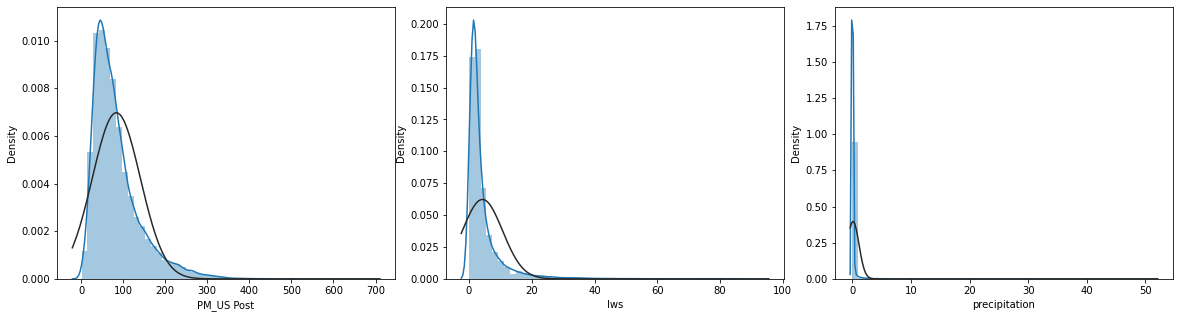

In [32]:
import seaborn as sb
from scipy.stats import norm
fig, ax = plt.subplots(1, 3, figsize=[20,5])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
sb.distplot(df['PM_US Post'], fit=norm,ax=ax[0])
sb.distplot(df['Iws'], fit=norm,ax=ax[1])
sb.distplot(df['precipitation'], fit=norm,ax=ax[2])

-Iz prikazanih grafika kao i koeficijenata spljoštenosti i asimetrije vidi se da od normalne raspodjele najviše odstupaju obiljezja PM2.5, Iws i precipitation. Oni posjeduju autlajere koji se mnogo razlikuju od vrijednosti koje se najčešće pojavljuju kao što je već spominjano i vidi se da su u sva tri grafika koeficijenti spljoštenosti pozitivni što ukazuje na veliki broj uzoraka koji imaju jako slične vrijednsoti u malom opsegu 

## <h3>Analiza obilježja PM2.5</h3>

In [33]:

kurtosis= df['PM_US Post'].kurtosis(axis = 0) 
skewnes=df['PM_US Post'].skew(axis = 0) 
print( "Koeficijent spljoštenosti:" , kurtosis )
print( "Koeficijent asimetrije:" , skewnes )
print("\n Statistička obilježja:")
df['PM_US Post'].describe()

Koeficijent spljoštenosti: 4.436070551066427
Koeficijent asimetrije: 1.7308647478973462

 Statistička obilježja:


count   28810.00
mean       83.63
std        57.16
min         1.00
25%        44.00
50%        69.00
75%       105.00
max       688.00
Name: PM_US Post, dtype: float64

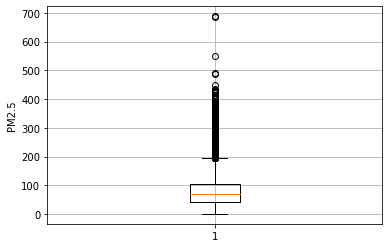

In [280]:
plt.boxplot([df['PM_US Post']]) 
plt.ylabel('PM2.5')
plt.grid()

-Iz prikazanih podataka se vidi da je <u>interkvartilni opseg izmedju 44ug/m3 i 106ug/m3</u> i tu se nalazi 50% uzoraka, dok je dinamički opseg od 1 do čak 688ug/m3 što potvrđuje da dinamički opseg nije mjerodavan za utvrđivanje u kom opsegu se najčešće pojavljaju vrijednosti<br>
-Postoji veliki broj autlajera koji su veoma udaljeni na visokim vrijednostima, gdje se pojavljuje čak i vrijednost od <u>688ug/m3.</u> <br>
-Za niske vrijednosti ne postoje autlajeri. Ovo potvrđuju i koeficijenti spljoštenosti i asimetrije gdje ovo obilježje ima desnu asimetričnu raspodjelu sa vrijednostima koje  mnogo odstupaju od srednje vrijednosti i medijane na gornjoj strani.

<h5>Analiza PM2.5 po godinama</h5>

In [34]:
df['year'].unique()

array([2012, 2013, 2014, 2015], dtype=int64)

In [35]:
df2012=df[df['year']==2012]
df2013=df[df['year']==2013]
df2014=df[df['year']==2014]
df2015=df[df['year']==2015]

Text(0.5, 0.98, 'Raspodjela koncentracije PM2.5 čestica po godinama')

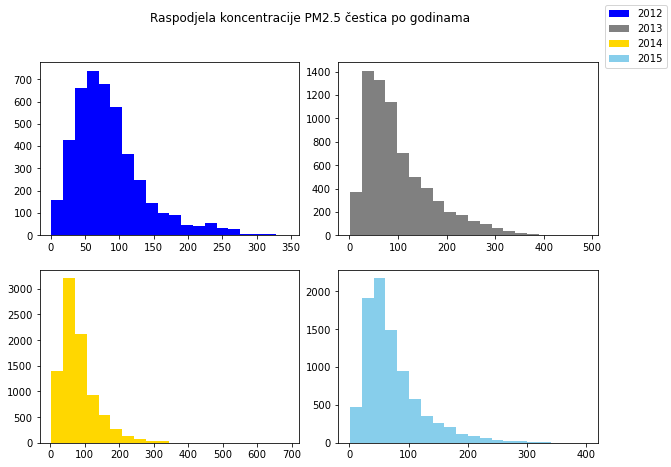

In [36]:
fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0,0].hist(df2012['PM_US Post'],color='blue', label = "2012",bins=20)
ax[0,1].hist(df2013['PM_US Post'], color='gray', label = "2013",bins=20)
ax[1,0].hist(df2014['PM_US Post'], color='gold', label = "2014",bins=20)
ax[1,1].hist(df2015['PM_US Post'], color='skyblue', label = "2015",bins=20)
fig.legend()
fig.suptitle("Raspodjela koncentracije PM2.5 čestica po godinama")

-Na grafiku iznad se uočava da je raspodjela po godinama veoma slična i da je u pitanju desno asimetrična raspodjela

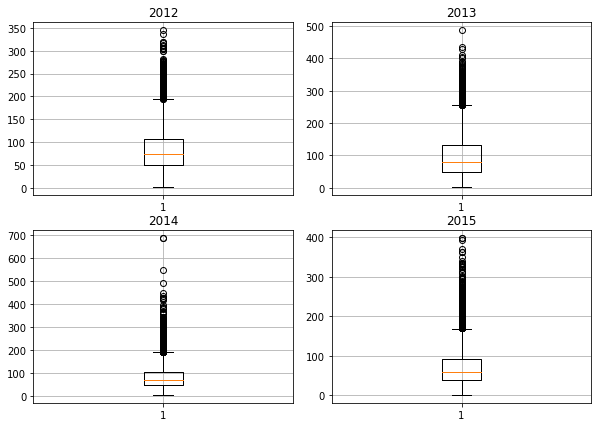

In [37]:
fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0,0].boxplot(df2012['PM_US Post'])
ax[0,0].set_title('2012')
ax[0,0].grid()

ax[0,1].boxplot(df2013['PM_US Post'])
ax[0,1].set_title('2013')
ax[0,1].grid()

ax[1,0].boxplot(df2014['PM_US Post'])
ax[1,0].set_title('2014')
ax[1,0].grid()

ax[1,1].boxplot(df2015['PM_US Post'])
ax[1,1].set_title('2015')
ax[1,1].grid()


In [38]:
IQR2012donja=df2012['PM_US Post'].quantile(0.25)
IQR2012gornja=df2012['PM_US Post'].quantile(0.75)
IQR2013donja=df2013['PM_US Post'].quantile(0.25)
IQR2013gornja=df2013['PM_US Post'].quantile(0.75)
IQR2014donja=df2014['PM_US Post'].quantile(0.25)
IQR2014gornja=df2014['PM_US Post'].quantile(0.75)
IQR2015donja=df2015['PM_US Post'].quantile(0.25)
IQR2015gornja=df2015['PM_US Post'].quantile(0.75)
print("IQR opseg za 2012.godinu:",IQR2012donja,"-",IQR2012gornja,"ug/m3")
print("IQR opseg za 2013.godinu:",IQR2013donja,"-",IQR2013gornja,"ug/m3")
print("IQR opseg za 2014.godinu:",IQR2014donja,"-",IQR2014gornja,"ug/m3")
print("IQR opseg za 2015.godinu:",IQR2015donja,"-",IQR2015gornja,"ug/m3")


IQR opseg za 2012.godinu: 49.0 - 107.0 ug/m3
IQR opseg za 2013.godinu: 49.0 - 132.0 ug/m3
IQR opseg za 2014.godinu: 45.0 - 103.0 ug/m3
IQR opseg za 2015.godinu: 39.0 - 91.0 ug/m3


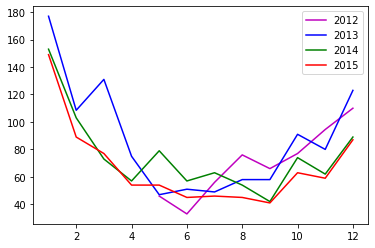

In [39]:
d2012= df2012[['PM_US Post','month']].groupby("month").median()
d2013= df2013[['PM_US Post','month']].groupby("month").median()
d2014= df2014[['PM_US Post','month']].groupby("month").median()
d2015= df2015[['PM_US Post','month']].groupby("month").median()
plt.plot(np.arange(5, 13, 1), d2012, 'm', label='2012')
plt.plot(np.arange(1, 13, 1), d2013, 'b', label='2013')
plt.plot(np.arange(1, 13, 1), d2014, 'g', label='2014')
plt.plot(np.arange(1, 13, 1), d2015, 'r', label='2015')
plt.legend()


-Sa prethodnih grafika mozemo vidjeti da je koncentracija PM.5 čestica većinom od <u>50 do 100 ug/m3</u>.<br>
-2013.godine su zabilježene nešto veće vrijednosti.<br>
-Iz zadnjeg grafika moze se primjetiti da se sredisnja vrijednost zagadjenih cestica na mjsecnom nivou blago smanjuje iz godine u godinu.<br>
-Kad su u pitanju autlajeri i oni se ponavljaju svake godine sa sličnim vrijednsotima, ali najveći je bio<u> 2014.godine-688 ug/m3 </u> i te godine je generalno bilo više uzoraka sa ekstremnim koncentracijama PM2.5 čestica. NI jedne godine nisu pristutni donji autlajeri<br>
-Vidi se i da vrijednosti opadaju najvise oko 4.,5., i 6. mjeseca tj. najniže su tada a najvise su tokom januara i decembra,zato slijedi analiza po godišnjim dobima

<h5>Analiza na osnovu godisnjih doba(sezona)</h5>

In [40]:
#Razdvajam bazu po godisnjim dobima
dfSpring=df[df['season']==1]
dfSummer=df[df['season']==2]
dfAutumn=df[df['season']==3]
dfWinter=df[df['season']==4]


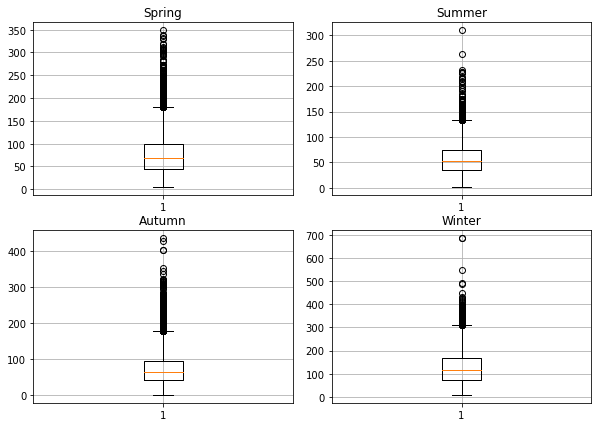

In [41]:
fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0,0].boxplot(dfSpring['PM_US Post'])
ax[0,0].set_title('Spring')
ax[0,0].grid()

ax[0,1].boxplot(dfSummer['PM_US Post'])
ax[0,1].set_title('Summer')
ax[0,1].grid()

ax[1,0].boxplot(dfAutumn['PM_US Post'])
ax[1,0].set_title('Autumn')
ax[1,0].grid()

ax[1,1].boxplot(dfWinter['PM_US Post'])
ax[1,1].set_title('Winter')
ax[1,1].grid()

In [42]:
dfSpring['PM_US Post'].describe()

count   5354.00
mean      78.17
std       47.17
min        4.00
25%       45.00
50%       68.00
75%       99.00
max      349.00
Name: PM_US Post, dtype: float64

In [43]:
dfSummer['PM_US Post'].describe()

count   8094.00
mean      56.74
std       28.99
min        1.00
25%       36.00
50%       52.00
75%       75.00
max      310.00
Name: PM_US Post, dtype: float64

In [44]:
dfAutumn['PM_US Post'].describe()

count   8231.00
mean      75.52
std       47.72
min        1.00
25%       42.00
50%       64.00
75%       96.00
max      436.00
Name: PM_US Post, dtype: float64

In [45]:
dfWinter['PM_US Post'].describe()

count   7131.00
mean     127.62
std       71.38
min        8.00
25%       74.00
50%      114.00
75%      168.00
max      688.00
Name: PM_US Post, dtype: float64

-Kao što se dalo pretpostaviti na osnovu linijskih grafikona za mjesece iz prethodne analize po godinama, po datim grafikonima za godisnja doba se može reći da su vrijednosti obilježja PM2.5 tokom ljeta najniže<br>
-Ako se porede maksimalne koncentracije za svako godisnje doba, rezultat je da su i one najniže ljeti u odnosu na druga doba.To se isto odnosi i na minimune.<br>
-Interkvartilni opseg za ljeto je od 36 do 73 ug/m3. Malo više vrijesnoti ima jesen a slično i proljeće. <br>
-Tokom jeseni su zabilježene više vrijednosti PM2.5 kao autlajeri.<br>
-Najveća zagađenost vazduha je tokom zime, najčesce od 74 do 168 ug/m3 što je po svjetskim skalama ekstremna zagađenost vazduha.To se dešava zbog sezone grijanja koja je zimi u toku.<br>

##  <h3>Zavisnost promjene PM2.5 od ostalih obilježja u bazi</h3>

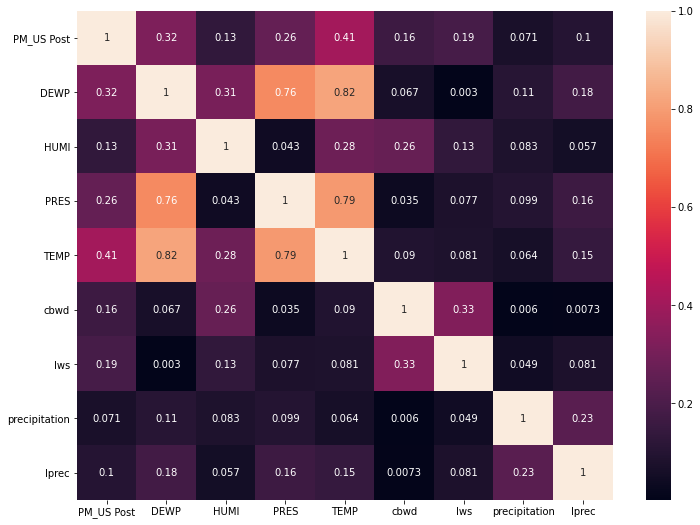

In [47]:

corr = df[['PM_US Post','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']].corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);

-Iz tabele se vidi da je obilježje TEMP najviše korelisano sa koncentracijom PM2.5 čestica (0,41),a odmah iza toga je obilježje DEWP sa vrijednosšću 0,32

Text(0.5, 1.0, 'Prosječna temperatura po godišnjim dobima')

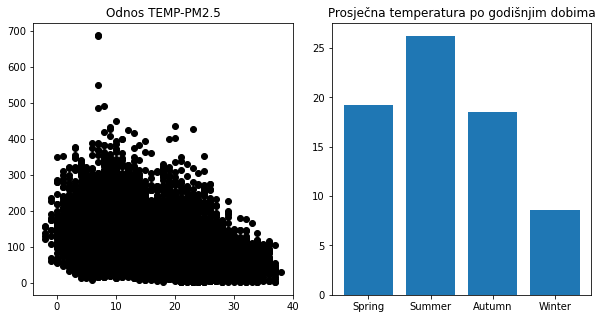

In [48]:
fig, ax = plt.subplots(1, 2, figsize=[10,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

x=['Spring','Summer','Autumn','Winter']
height=[dfSpring['TEMP'].mean(),dfSummer['TEMP'].mean(),dfAutumn['TEMP'].mean(),dfWinter['TEMP'].mean()]
ax[0].scatter( df['TEMP'],df['PM_US Post'], color='black', label="PM2.5-TEMP")
ax[1].bar(x,height)
ax[0].set_title("Odnos TEMP-PM2.5")
ax[1].set_title("Prosječna temperatura po godišnjim dobima")


-Kao što je i primjećeno,<u>koncentracija zagađujućih čestica je najveća tokom zime</u> kada je prosječna temperatura ispod 10 stepeni Celzijusa što se primjeti na prvom grafiku gdje su ekstremne koncentracije čestica baš tada zabilježene.<br>
-Ljeti prosječne temperature idu preko 25 stepeni Celzijusa i na prvom grafiku se vidi kako vrijednosti obilježja PM2.5 na tom intervalu opadaju.<br>
-Grafikoni ukazuju na to da su temepratura i PM2.5 negativno korelisani.


Text(0.5, 1.0, 'Odnos Iws-PM2.5')

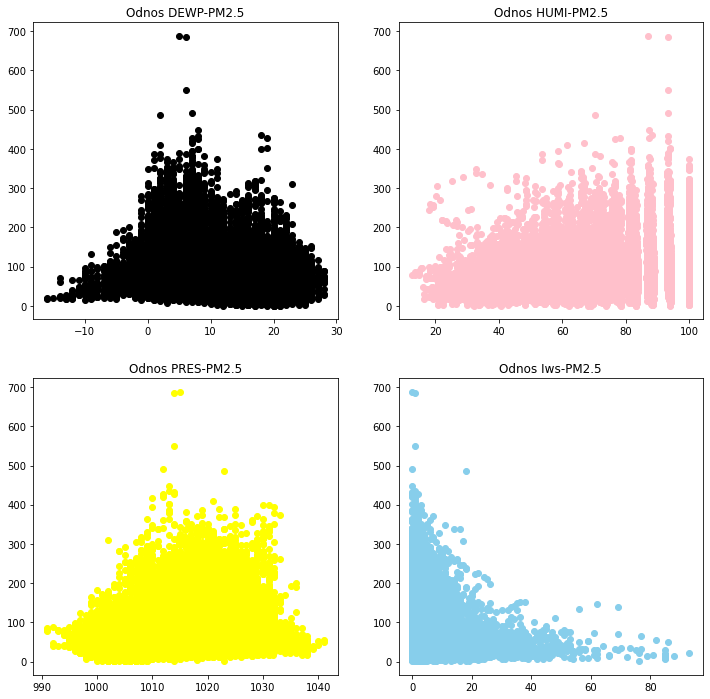

In [50]:

fig, axs = plt.subplots(2,2,figsize=(12,12))
axs[0, 0].scatter(df['DEWP'],df['PM_US Post'], color='black')
axs[0, 0].set_title('Odnos DEWP-PM2.5')
axs[0, 1].scatter(df['HUMI'],df['PM_US Post'], color='pink')
axs[0, 1].set_title('Odnos HUMI-PM2.5')
axs[1, 0].scatter(df['PRES'],df['PM_US Post'], color='yellow')
axs[1, 0].set_title('Odnos PRES-PM2.5')
axs[1, 1].scatter(df['Iws'],df['PM_US Post'], color='skyblue')
axs[1, 1].set_title('Odnos Iws-PM2.5')


-Iz datih grafika se vidi da se koncentracija zagađenih čestica PM2.5 za obilježja DEWP i PRES ponaša slično tj. za granične vrijedsnoti(na min i max strani) je koncentacija PM2.5 čestica manje izražena nego kada DEWP i PRES imaju vrijednsoti približne medijani<br>
-Za obilježje HUMI se vidi da koncentracija raste kako se i njegove vrijednsoti povećavaju <br>
-Iz posljednjeg se može zaključiti da je veća koncentracija PM2.5 čestica što je brzina vjetra manja, kada zu zabiljezene velike brzine vjetrova tada je bila manja količina zagađenih čestica

## <h3>Međukorelacija ostalih obilježja </h3>

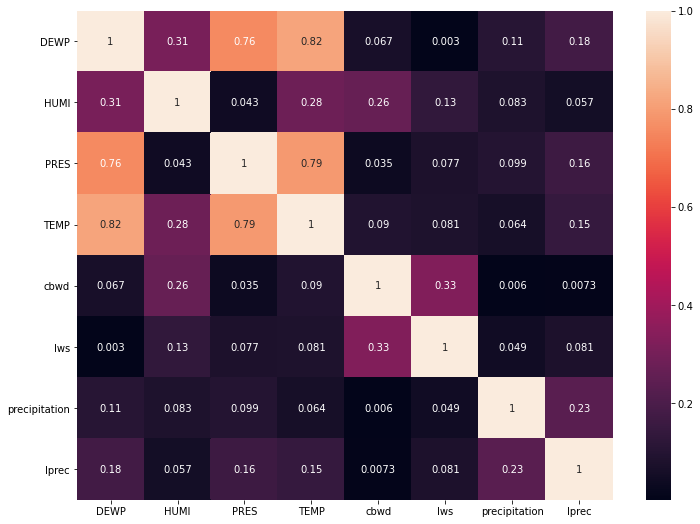

In [51]:
#korelacija obilježja
corr = df[['DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']].corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);

-Iz prikazanih podataka vidi se da su najviše korelisana obilježja TEMP i DEWP, TEMP i PRES, PRES i DEWP

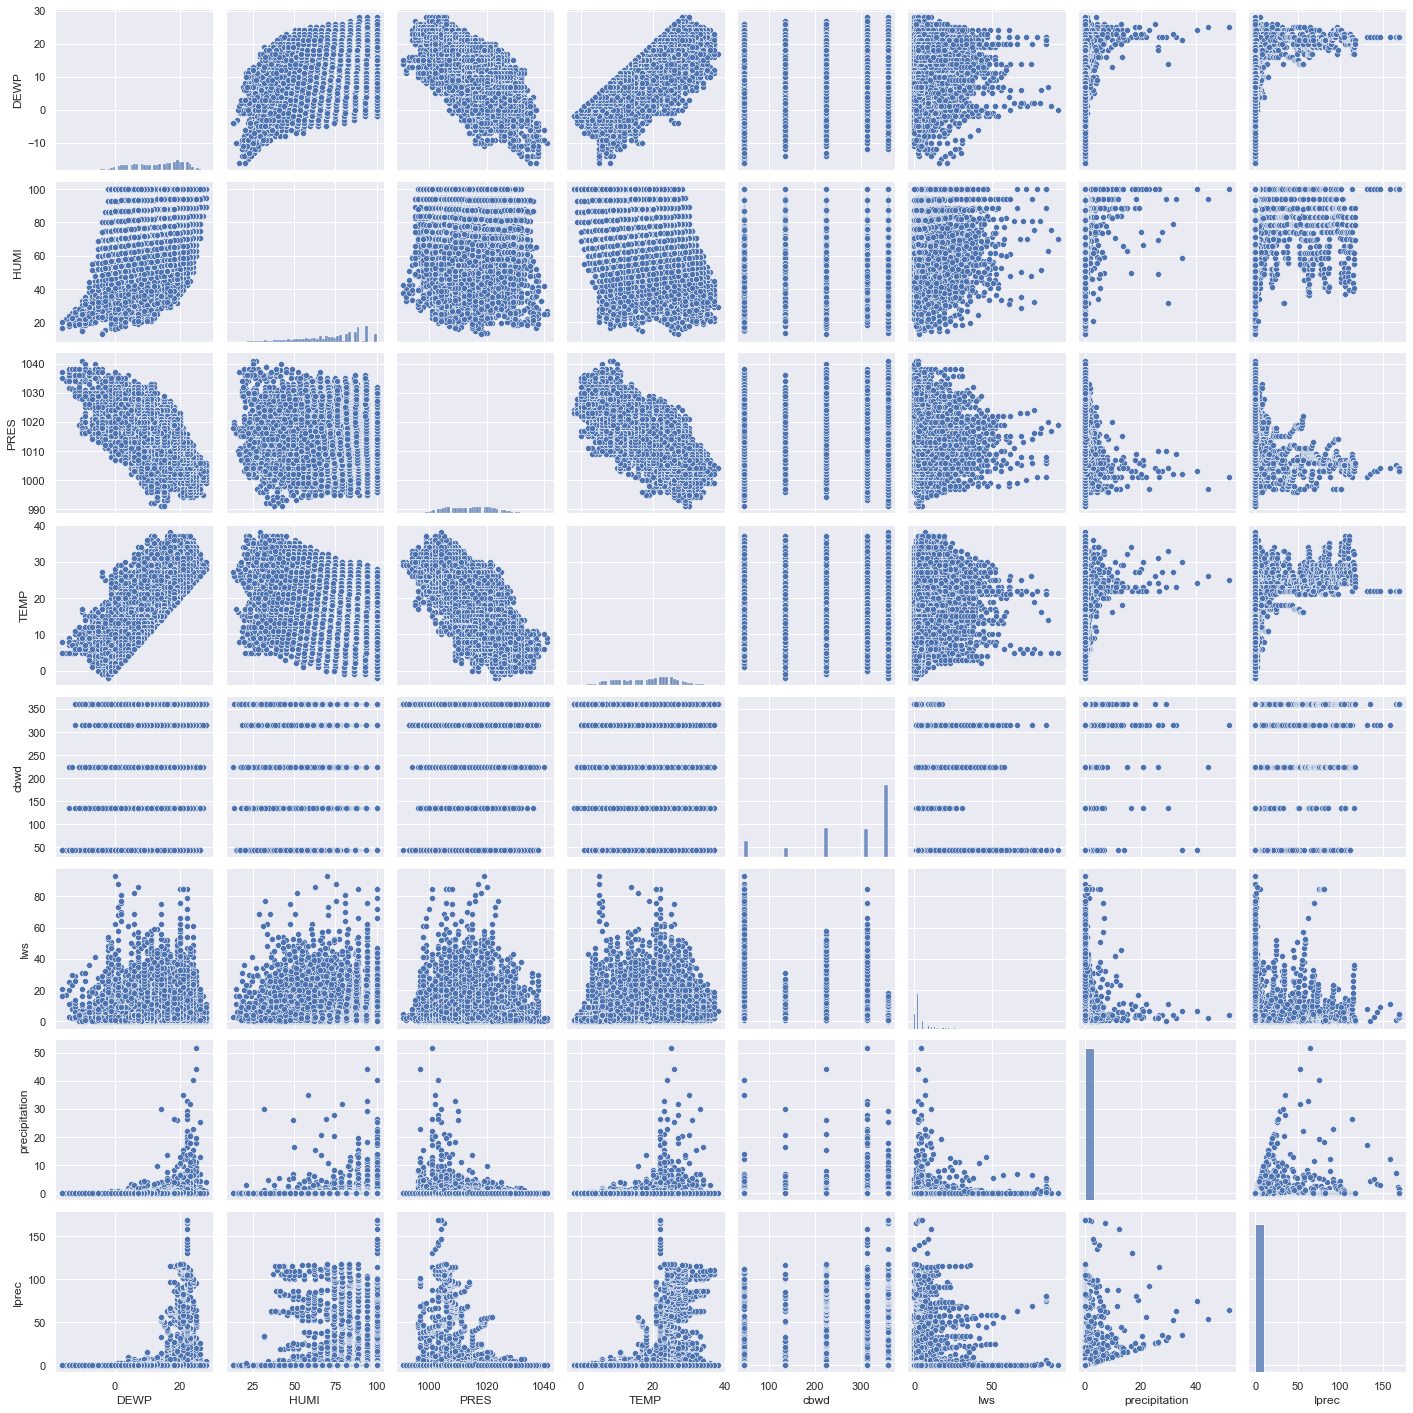

In [52]:
sns.set()
sns.pairplot(df[['DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']], height = 2.5)
plt.show();

Text(0.5, 1.0, 'PRES-DEWP')

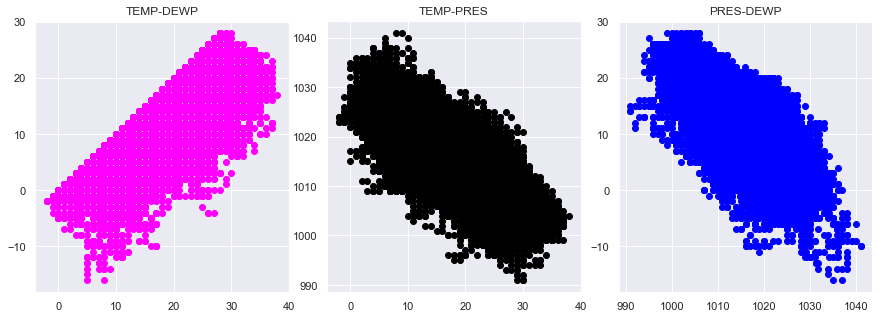

In [295]:
fig, ax = plt.subplots(1, 3, figsize=[15,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].scatter(df['TEMP'], df['DEWP'], color='magenta', label="TEMP-DEWP")
ax[0].set_title('TEMP-DEWP')
ax[1].scatter(df['TEMP'], df['PRES'], color='black', label="TEMP-PRES")
ax[1].set_title('TEMP-PRES')
ax[2].scatter(df['PRES'], df['DEWP'], color='blue', label="PRES-DEWP")
ax[2].set_title('PRES-DEWP')


-Temperatura i temperatura rose/kondenzacije su pozitivno korelisana obilježja, što bi značilo da povećane jedna vrijednsoti dovodi do povećanja druge<br>
-Tempertura i vazdušni pritisak su negativno korelisani, što bi značilo da ako se temperatura poveća, vazdušni pritisak je manji a znači i količina PM2.5 čestica
-Vazdušni pritisak i temepratura rose su također negativno korelisani


-Obilježje koje ima najmanju korelaciju sa PM2.5 a i ostaim obilježjima jesu padavine po satu (percipitation)<br>
-To je moguće zbog toga sto i 75% uzoraka ima vrijednost 0.<br>
-Da bi se provjerilo postoji li zavisnost između koncentracije PM2.5 čestica i padavina,padavine se mogu posmatrati kao binarno obilježje koje bi označavalo da li je padala kiša ili nije.

In [53]:
#baze sa uzorcima za kišne i sušne dane
dfIsRain=df[df['precipitation']!=0]
dfNotRain=df[df['precipitation']==0]
print(dfIsRain.head())
print("\n \n")
print(dfNotRain.head())


    year  month  day  hour  season  PM_US Post  DEWP  HUMI    PRES  TEMP  \
14  2012      6    6     3       2       76.00 19.00 88.37 1006.10 21.00   
15  2012      6    6     4       2       74.00 19.00 88.37 1006.10 21.00   
16  2012      6    6     5       2       69.00 19.00 93.98 1005.10 20.00   
34  2012      6    6    23       2        3.00 19.00 88.37 1007.10 21.00   
35  2012      6    7     0       2      117.00 19.00 88.37 1007.10 21.00   

    cbwd  Iws  precipitation  Iprec  
14   360 0.00           0.50   0.50  
15   360 0.00           0.70   1.20  
16   360 0.00           0.10   1.30  
34   360 1.00           0.20   0.20  
35   360 2.00           0.80   1.00  

 

   year  month  day  hour  season  PM_US Post  DEWP  HUMI    PRES  TEMP  cbwd  \
0  2012      5   14    14       1       46.00  4.00 24.24 1013.90 26.00   360   
1  2012      6    4    23       2       69.00 18.00 88.28 1008.10 20.00   360   
2  2012      6    5    15       2       98.00 19.00 88.37 1004.10 21

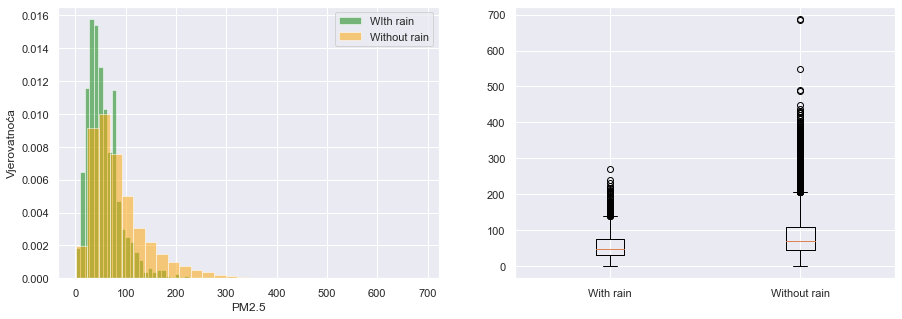

In [54]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].hist(dfIsRain['PM_US Post'] , density=True, alpha=0.5, bins=30, label ='WIth rain',color='green')
ax[0].hist(dfNotRain['PM_US Post'] , density=True, alpha=0.5, bins=30, label ='Without rain',color='orange')
ax[1].boxplot([dfIsRain['PM_US Post'],dfNotRain['PM_US Post']])
plt.xticks([1, 2], ["With rain", "Without rain"])
ax[0].set_xlabel('PM2.5')
ax[0].set_ylabel('Vjerovatnoća')
ax[0].legend()

-Podaci iz grafikona govore da tokom kišnih dana najveci broj uzoraka ima koncentraciju od oko 25 do 75 ug/m3, dok su granice za dane bez kiše pomjerene na više vrijednsoti i veća je vjerovatnoća da će biti izmjerena velika količina PM2.5 čestica, na šta ukazuje i veliki broj i raspon autlajera kod grafikona za dane bez kiše. <br>
-Sažeto, manje su koncentracije PM2.5 čestica tokom kišnih dana

-Broj dana sa padavinama na mjesečnom nivou

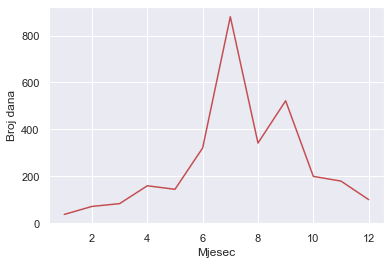

In [55]:
drain= dfIsRain[['precipitation','month']].groupby("month").count()


plt.xlabel("Mjesec")
plt.ylabel("Broj dana")
plt.plot(np.arange(1, 13, 1), drain, 'r')

-Najviše padavina je tokom ljetnih mjeseci i zatim jesenjih mjeseci. To se slaže sa zaključkom da je tada prisutan manji broj zagađujućih tj PM2.5 čestica u vazduhu, kao što je prikazano i na grafiku iznad sa box plotovima.

## <h3>Linearna regresija</h3>

-Izbacivanje obilježja PM2.5 iz skupa za obuku i ubacivanje u skup za testiranje

In [56]:
#x-skup za obuku, y-skup za testiranje
x=df.drop(['PM_US Post'], axis=1)
y=df['PM_US Post']

In [57]:
x

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,4.00,24.24,1013.90,26.00,360,2.00,0.00,0.00
1,2012,6,4,23,2,18.00,88.28,1008.10,20.00,360,4.00,0.00,0.00
2,2012,6,5,15,2,19.00,88.37,1004.10,21.00,360,4.00,0.00,0.00
3,2012,6,5,16,2,20.00,83.25,1003.10,23.00,360,4.00,0.00,0.00
4,2012,6,5,17,2,18.00,73.50,1003.10,23.00,45,2.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,2015,12,31,19,4,7.00,87.28,1027.00,9.00,315,2.00,0.00,0.00
28806,2015,12,31,20,4,7.00,87.28,1028.00,9.00,315,4.00,0.00,0.00
28807,2015,12,31,21,4,7.00,87.28,1028.00,9.00,360,1.00,0.00,0.00
28808,2015,12,31,22,4,7.00,93.40,1028.00,8.00,315,2.00,0.00,0.00


In [58]:
#Funkcija koja računa različite mjere uspješnosti regresora
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) 
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [59]:
# podjela skupa na trening i test podatke gdje je 10% uzoraka predviđeno za test skup a 90% za obuku modela
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

-Skaliranje podataka-standardizacija koje normalizuje oblježja tako da imaju strednju vrijednost 0 i standardnu devijaciju 1,što dovodi do ubrzanja obuke

In [60]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1.18,-0.88,-0.31,0.07,-1.52,-0.37,-1.60,1.42,0.60,0.33,-0.36,-0.11,-0.17
1,0.23,-1.17,-1.22,-1.66,-1.52,-0.90,-0.34,0.80,-0.82,-0.54,-0.36,-0.11,-0.17
2,1.18,-1.46,0.37,-1.51,1.34,-0.64,-0.31,-0.31,-0.56,0.76,-0.05,-0.11,-0.17
3,0.23,-0.00,-1.22,-1.37,-0.57,0.96,0.06,-1.30,0.86,-0.54,3.54,0.09,1.70
4,-0.72,0.58,-1.22,-1.08,0.39,0.30,0.84,0.18,-0.17,-0.54,0.27,0.09,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25924,1.18,-1.17,-1.22,0.07,-1.52,-1.30,-0.12,0.80,-1.34,-2.28,-0.05,-0.11,-0.17
25925,-0.72,-1.46,-0.42,-0.79,1.34,-1.57,-0.64,1.66,-1.34,0.33,-0.05,-0.11,-0.17
25926,-1.68,-0.00,1.17,-0.07,-0.57,1.36,-0.56,-1.04,1.64,-0.54,0.27,-0.11,-0.17
25927,0.23,-0.00,-0.99,0.07,-0.57,1.23,0.87,-0.93,0.73,0.33,1.51,0.09,2.73


Skaliranje se izvršilo da bi se neka obilježja ne bi izdvajala po svojim vrijendostima od drugih i tako uticala na donošenjepogrešnih odluka modela


<h5>Hipoteza y=b0+b1x1+b2x2+...+bnxn </h5> 

Mean squared error:  2372.9471549641285
Mean absolute error:  35.48141415726595
Root mean squared error:  48.712905425196396
R2 score:  0.2902577976305406
R2 adjusted score:  0.28990176256857636
        y  y_pred
0   37.00   27.69
1   73.00   66.72
2   23.00   74.67
3  166.00   72.63
4   75.00  123.93
5   59.00   47.23
6   61.00   88.20
7   70.00   85.92
8   80.00   57.88
9   36.00   56.51
10 118.00   70.47
11  50.00   70.35
12  74.00   68.14
13  59.00   82.70
14 118.00  148.63
15   9.00   74.51
16 153.00  131.71
17  61.00   95.31
18  42.00   59.34
19  27.00   86.77


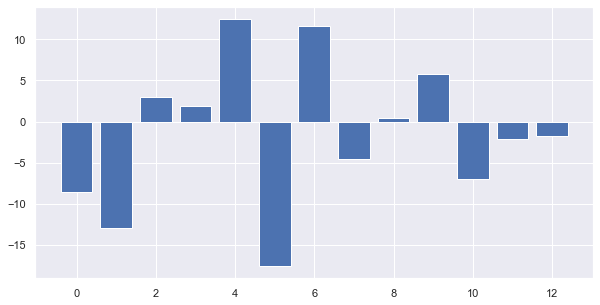

koeficijenti:  [ -8.55286582 -12.96960841   3.00954749   1.94324404  12.50552296
 -17.58065493  11.59504007  -4.55424133   0.47359731   5.74631249
  -6.98896797  -2.127584    -1.72609979]


In [61]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train_std, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)

Na osnovu dobijenih vrijednosti greška zaključuje se da model nije dovoljeno dobro obučen tj. daje veće greške. Otprilike promašuje za oko 35ug/m3 od stvarne vrijednosti. <br>

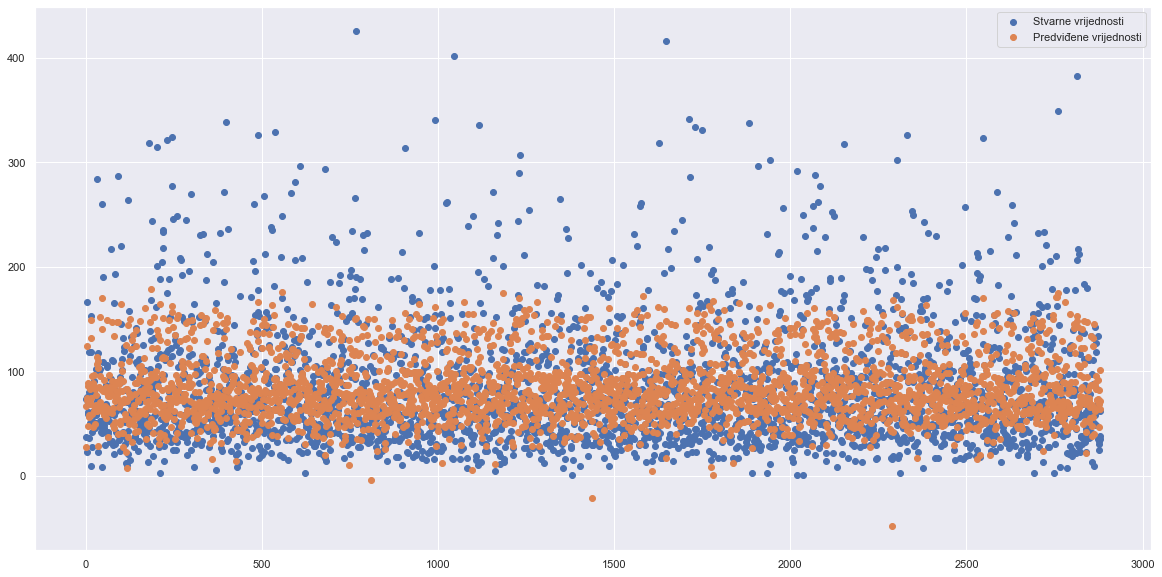

In [62]:
#vizuelni prikaz kako su stvarne vrijednosti PM2.5 raspoređene i one koje du dobijene predviđanjem
x0=range(0,len(y_test.values))
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted,label="Predviđene vrijednosti")
plt.legend()

-Vidi se da su predviđene vrijeddnosti najviše oko medijane i ne predviđaju dobro ekstremnije vrijednsoti

U cilju poboljšanja predviđanja treba da se <u>izvrši selekcija obilježja</u>, jer je prisutan veći broj obilježja koja učestvuju u modelu i čine ga kompleksnim

In [63]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     763.6
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:12:14   Log-Likelihood:            -1.3746e+05
No. Observations:               25929   AIC:                         2.749e+05
Df Residuals:                   25915   BIC:                         2.751e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.703e+04    597.836     28.487      0.000    1.59e+04    1.82e+04
year             -8.1526      0.300    -27.215      0.000      -8.740      -7.565
month            -3.7824      0.106    -35.700      0.000      -3.990      -3.575
day               0.3421      0.034      9.959      0.000       0.275       0.409
hour              0.2804      0.048      5.817      0.000       0.186       0.375
season           11.8934      0.393     30.274      0.000      11.123      12.663
DEWP             -2.3422      0.369     -6.342      0.000      -3.066      -1.618
HUMI              0.6386      0.093      6.874      0.000       0.456       0.821
PRES             -0.5623      0.070     -8.028      0.000      -0.700      -0.425
TEMP              0.0612      0.360      0.170      0.865      -0.645       0.768
cbwd              0.0556      0.003     17.406      0.000       0.049       0.062
Iws              -1.0913      0.051    -21.534      0.000      -1.191      -0.992
precipitation    -2.0573      0.302     -6.811      0.000      -2.649      -1.465
Iprec            -0.1526      0.028     -5.463      0.000      -0.207      -0.098
==============================================================================
Omnibus:                     7336.080   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29109.545
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                       7.419   Cond. No.                     4.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Na osnovu p vrijednosti koja je za TEMP 0.86 što je veće od 1% koje je uzeto za prag , to obilježje se treba odbaciti

In [65]:
x.drop('TEMP',axis = 1,inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

KeyError: "['TEMP'] not found in axis"

S obzirom da su nastali novi skupovi podataka opet ih treba normalizovati i ponovi postupak selekcije

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)

In [66]:
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     827.2
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:13:38   Log-Likelihood:            -1.3746e+05
No. Observations:               25929   AIC:                         2.749e+05
Df Residuals:                   25916   BIC:                         2.751e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.703e+04    597.553     28.505      0.000    1.59e+04    1.82e+04
year             -8.1525      0.300    -27.215      0.000      -8.740      -7.565
month            -3.7800      0.105    -36.002      0.000      -3.986      -3.574
day               0.3420      0.034      9.958      0.000       0.275       0.409
hour              0.2797      0.048      5.821      0.000       0.186       0.374
season           11.8866      0.391     30.418      0.000      11.121      12.653
DEWP             -2.2812      0.085    -26.977      0.000      -2.447      -2.115
HUMI              0.6233      0.023     27.530      0.000       0.579       0.668
PRES             -0.5640      0.069     -8.138      0.000      -0.700      -0.428
cbwd              0.0556      0.003     17.406      0.000       0.049       0.062
Iws              -1.0915      0.051    -21.540      0.000      -1.191      -0.992
precipitation    -2.0554      0.302     -6.809      0.000      -2.647      -1.464
Iprec            -0.1525      0.028     -5.461      0.000      -0.207      -0.098
==============================================================================
Omnibus:                     7338.172   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29127.665
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                       7.420   Cond. No.                     4.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sve vrijednsoti p su nule pa se dalje ne odbacuje ni jedno obilježje i ponavlja se obučavanje za prvu hipotezu

Mean squared error:  2372.9471549641285
Mean absolute error:  35.48141415726595
Root mean squared error:  48.712905425196396
R2 score:  0.2902577976305406
R2 adjusted score:  0.28990176256857636
        y  y_pred
0   37.00   27.69
1   73.00   66.72
2   23.00   74.67
3  166.00   72.63
4   75.00  123.93
5   59.00   47.23
6   61.00   88.20
7   70.00   85.92
8   80.00   57.88
9   36.00   56.51
10 118.00   70.47
11  50.00   70.35
12  74.00   68.14
13  59.00   82.70
14 118.00  148.63
15   9.00   74.51
16 153.00  131.71
17  61.00   95.31
18  42.00   59.34
19  27.00   86.77
koeficijenti:  [ -8.55286582 -12.96960841   3.00954749   1.94324404  12.50552296
 -17.58065493  11.59504007  -4.55424133   0.47359731   5.74631249
  -6.98896797  -2.127584    -1.72609979]


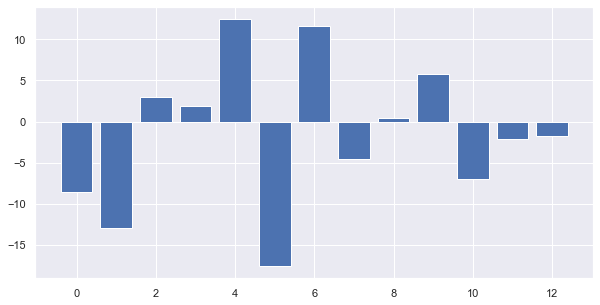

In [67]:
#nakon izbacivanje temeprature
first_regression_model = LinearRegression(fit_intercept=True, normalize=False)
first_regression_model.fit(x_train_std, y_train)
y_predicted = first_regression_model.predict(x_test_std)
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("koeficijenti: ", first_regression_model.coef_)

Zaključuje se da se greške nisu smanjile ni nakon selekcije tj. treba da se promijeni model kako bi rezultati bili bolji

<h5>Hipoteza y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...</h5>

Mean squared error:  2119.144237903952
Mean absolute error:  33.75525129777188
Root mean squared error:  46.03416381236823
R2 score:  0.36616957718502696
R2 adjusted score:  0.3639371752623517
        y  y_pred
0   37.00   37.79
1   73.00   68.41
2   23.00   68.99
3  166.00   65.33
4   75.00  101.51
5   59.00   48.95
6   61.00   66.16
7   70.00   89.90
8   80.00   51.23
9   36.00   45.45
10 118.00   75.00
11  50.00   49.44
12  74.00   76.03
13  59.00   82.36
14 118.00  161.95
15   9.00   86.06
16 153.00  130.18
17  61.00   85.28
18  42.00   57.46
19  27.00   94.52
koeficijenti:  [-1.15518224e+01 -2.27649322e+01  3.21288053e+00  7.74033703e-01
  2.52925671e+01 -2.88420565e+02  1.55066626e+02 -3.43038372e+00
  2.82913631e+02  5.35665486e+00 -8.24034360e+00 -9.81023819e+00
 -1.58868227e+01 -3.31962221e-01  2.10443982e+00  1.51546118e-01
  6.36280311e-01  2.86750443e+00  8.69022266e-01  4.10200211e+00
  4.84450211e+00  3.93365744e-01 -3.01175761e-01  7.61946636e-01
  2.69092904e+00  3.8225

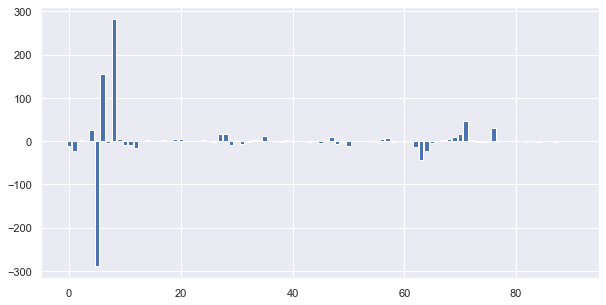

In [68]:
#u hipotezu se ubacuju samo interakcije izneđu obilježja
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

-Pošto su prisutne težine koje su više izražene od drugih slijedi reguralizacija na oba načina



Mean squared error:  2126.0961784062206
Mean absolute error:  33.73883602483979
Root mean squared error:  46.10961047771083
R2 score:  0.36409027021331486
R2 adjusted score:  0.36185054480360823
        y  y_pred
0   37.00   39.13
1   73.00   72.88
2   23.00   69.65
3  166.00   64.16
4   75.00  112.31
5   59.00   50.25
6   61.00   68.13
7   70.00   85.92
8   80.00   51.21
9   36.00   48.05
10 118.00   70.99
11  50.00   49.40
12  74.00   72.93
13  59.00   81.86
14 118.00  158.19
15   9.00   91.44
16 153.00  130.31
17  61.00   84.73
18  42.00   60.10
19  27.00   92.47
koeficijenti:  [-11.22864119 -24.33655209   3.05680233   0.93238746  25.56779954
  -0.           4.03014265  -2.6726877   -4.59998011   5.28628678
  -8.11837102  -8.09264976  -6.14596116   0.           2.10840699
   0.           0.169939     4.27291474   0.           3.44305284
   2.33648486   0.37519856  -0.03512541   0.43956283   2.67780317
   0.07030581  -0.88728331  14.01902748   6.16045913  -2.78420885
   1.98662702   

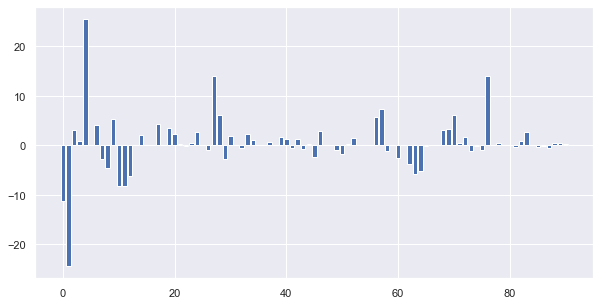

In [69]:
 lasso_model = Lasso(alpha=0.08)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

-Lasso regularizacija je izvršila i neku vrstu selekcije jer su koeficijenti za neke kombinacije 0.

Mean squared error:  2124.7774726953585
Mean absolute error:  33.68884913526509
Root mean squared error:  46.09530857576895
R2 score:  0.36448469159499064
R2 adjusted score:  0.36224635536923466
        y  y_pred
0   37.00   38.38
1   73.00   73.51
2   23.00   70.29
3  166.00   65.63
4   75.00  102.30
5   59.00   50.32
6   61.00   69.75
7   70.00   87.76
8   80.00   51.07
9   36.00   49.27
10 118.00   70.04
11  50.00   48.76
12  74.00   75.12
13  59.00   81.59
14 118.00  159.81
15   9.00   91.52
16 153.00  129.06
17  61.00   85.89
18  42.00   56.56
19  27.00   93.84


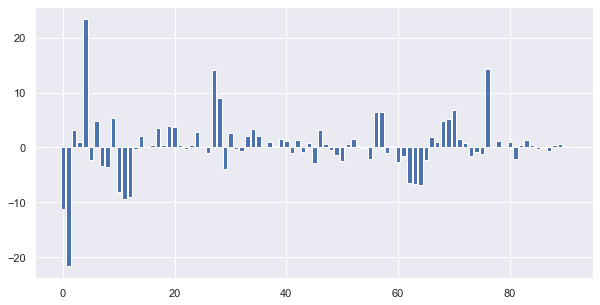

koeficijenti:  [-11.24031235 -21.63017523   3.18045909   1.04809912  23.44408085
  -2.245014     4.86167137  -3.44833548  -3.51963066   5.3254193
  -8.22976231  -9.37107325  -9.14003162  -0.21849261   2.13602437
   0.10605739   0.46276083   3.53674199   0.52301013   3.82814084
   3.64623679   0.43699132  -0.24576529   0.51346331   2.89252398
   0.14861042  -1.0456591   14.1468725    8.99591981  -3.89189078
   2.71099145  -0.3654965   -0.70347967   2.131231     3.42630871
   2.01587227   0.15462217   0.90603821   0.29373968   1.54642957
   1.15138083  -0.97665644   1.39250249  -0.76288589   0.79211194
  -2.76273688   3.13586236   0.56481848  -0.48870717  -1.38295349
  -2.44942444   0.55916554   1.6125205    0.28212392  -0.17509189
  -2.05228723   6.39960153   6.50318232  -1.11047154   0.21060649
  -2.67410188  -1.48827736  -6.54594047  -6.64265761  -6.8901346
  -2.33354715   1.96265008   1.01586307   4.84573285   5.24184472
   6.82311566   1.60302751   0.73851504  -1.65367099  -0.926309

In [70]:
ridge_model = Ridge(alpha=200)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

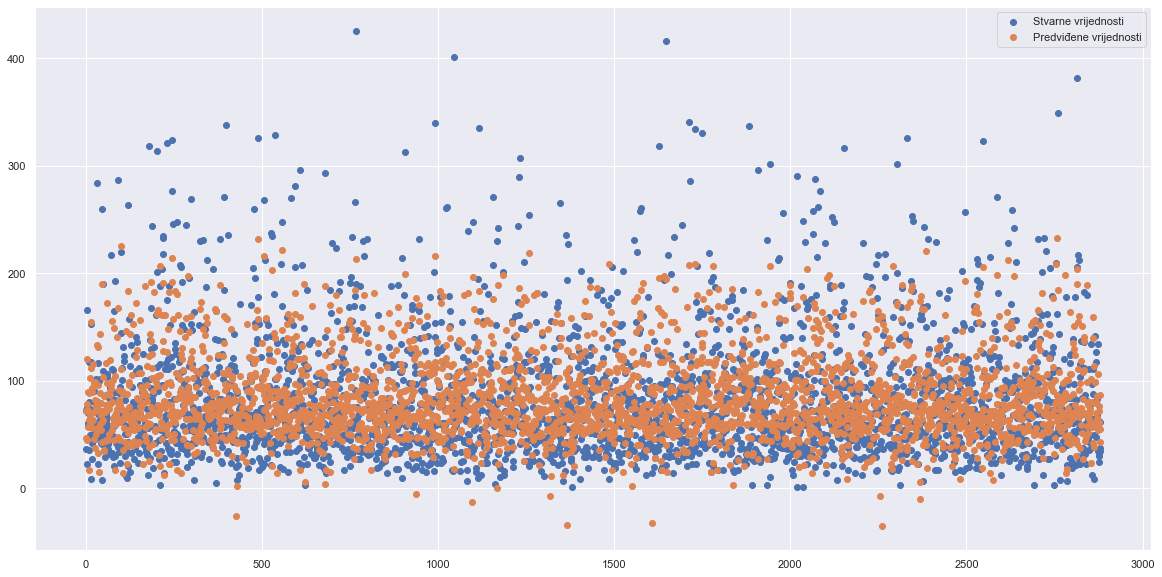

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted,label="Predviđene vrijednosti")
plt.legend()

-Sa ciljem još većeg pobolješanja modela on se proširuje tako da se dodaju članovi na kvadrat

Mean squared error:  1755.6340193887488
Mean absolute error:  30.969879841473198
Root mean squared error:  41.900286626570335
R2 score:  0.47489451972454344
R2 adjusted score:  0.4727797826602371
        y  y_pred
0   37.00   47.37
1   73.00   65.49
2   23.00   38.53
3  166.00   80.23
4   75.00  120.64
5   59.00   59.65
6   61.00   87.84
7   70.00   74.31
8   80.00   66.34
9   36.00    8.31
10 118.00   97.47
11  50.00   71.00
12  74.00  112.45
13  59.00   56.58
14 118.00  102.40
15   9.00   49.66
16 153.00  165.16
17  61.00   95.84
18  42.00   55.43
19  27.00   90.71
koeficijenti:  [-1.27841458e+01 -1.24260990e+00  2.19582646e+00 -1.07957811e+00
  4.10604860e-01 -5.84455750e+01  4.87182679e+01 -1.98980824e+00
  9.89771447e+01  2.74381343e+00 -1.00068776e+01 -7.49979851e+00
 -6.95063288e-01 -3.40939576e+00 -9.92396134e-01  1.49283592e+00
 -5.41434511e-01 -1.04173999e+00  8.07646488e-01  4.09988465e-01
  3.39296240e+00  6.27372517e+00  1.57246645e-01 -1.11620902e-01
  1.16767574e+00  1.3

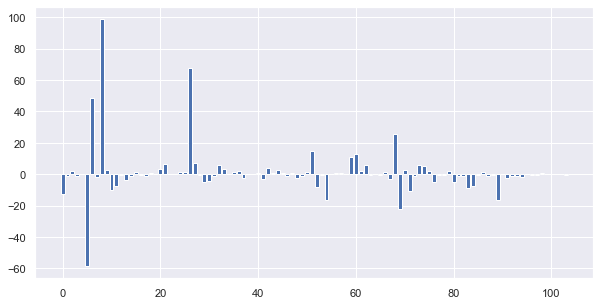

In [73]:
poly = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)
print(poly.get_feature_names())

Mean squared error:  1754.9213249923184
Mean absolute error:  30.903648395750036
Root mean squared error:  41.891781115062635
R2 score:  0.47510768472886333
R2 adjusted score:  0.47299380613576403
        y  y_pred
0   37.00   48.11
1   73.00   67.28
2   23.00   39.74
3  166.00   80.87
4   75.00  123.00
5   59.00   59.50
6   61.00   89.26
7   70.00   73.14
8   80.00   66.24
9   36.00   11.86
10 118.00   95.02
11  50.00   70.64
12  74.00  111.57
13  59.00   56.43
14 118.00  103.96
15   9.00   51.77
16 153.00  163.13
17  61.00   95.57
18  42.00   54.92
19  27.00   91.54
koeficijenti:  [-1.27293896e+01 -1.07170389e+00  2.19656552e+00 -4.78661814e-01
  0.00000000e+00  3.45584546e+01  0.00000000e+00 -1.83379958e+00
  5.02156725e+00  2.74507373e+00 -9.86525784e+00 -6.04023973e+00
 -0.00000000e+00 -3.28252767e+00 -7.16811856e-01  1.41657206e+00
 -5.11823228e-01 -9.35761498e-01  1.35701667e+00  0.00000000e+00
  2.81398914e+00  5.15436963e+00  1.63888938e-01 -2.15334138e-04
  7.71036384e-01  1.

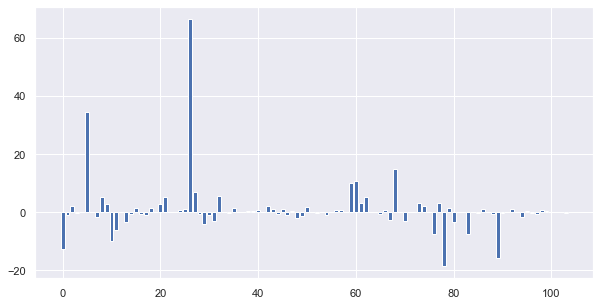

In [75]:
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

Mean squared error:  1773.1737426047
Mean absolute error:  30.961223357281607
Root mean squared error:  42.109069600321256
R2 score:  0.4696484350158311
R2 adjusted score:  0.4675125705967499
        y  y_pred
0   37.00   46.65
1   73.00   70.05
2   23.00   44.42
3  166.00   79.91
4   75.00  121.15
5   59.00   57.54
6   61.00   88.36
7   70.00   74.87
8   80.00   64.18
9   36.00   16.64
10 118.00   91.93
11  50.00   67.01
12  74.00  104.89
13  59.00   61.25
14 118.00  113.22
15   9.00   57.90
16 153.00  156.84
17  61.00   94.10
18  42.00   56.35
19  27.00   91.95


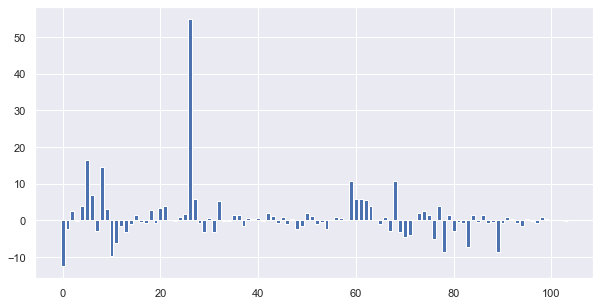

koeficijenti:  [-1.24210731e+01 -2.43739624e+00  2.41826307e+00 -2.33577635e-01
  3.78935670e+00  1.64608644e+01  6.83174755e+00 -2.98349688e+00
  1.46355232e+01  3.04087397e+00 -9.78650141e+00 -6.27802352e+00
 -1.50312101e+00 -3.28499542e+00 -8.63113418e-01  1.57443566e+00
 -4.61621850e-01 -8.02930499e-01  2.91705860e+00 -6.27888623e-01
  3.31382376e+00  3.87381872e+00  2.24919708e-01 -1.38941174e-01
  8.39058788e-01  1.69136907e+00  5.49047455e+01  5.74007578e+00
 -6.34087159e-01 -3.20300868e+00  5.92386854e-01 -3.20968949e+00
  5.26988429e+00 -1.56909385e-01 -2.52302192e-01  1.45315141e+00
  1.33247498e+00 -1.41605732e+00  5.43573978e-01  3.75084557e-01
  5.52343506e-01 -7.66531459e-02  2.08371723e+00  1.23566016e+00
 -6.01743799e-01  1.01750208e+00 -9.93770105e-01  4.21943078e-01
 -2.44208454e+00 -1.56076942e+00  2.00494965e+00  1.12790324e+00
 -9.80058255e-01 -3.68984809e-01 -2.31953813e+00  1.15621456e-01
  9.35151803e-01  7.36884842e-01 -2.49208714e-02  1.08253359e+01
  5.927014

In [76]:
ridge_model = Ridge(alpha=300)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

Smanjene su težine koje su najviše odstupale ali su se i greške malo pogoršale nakon regularizacije<br>

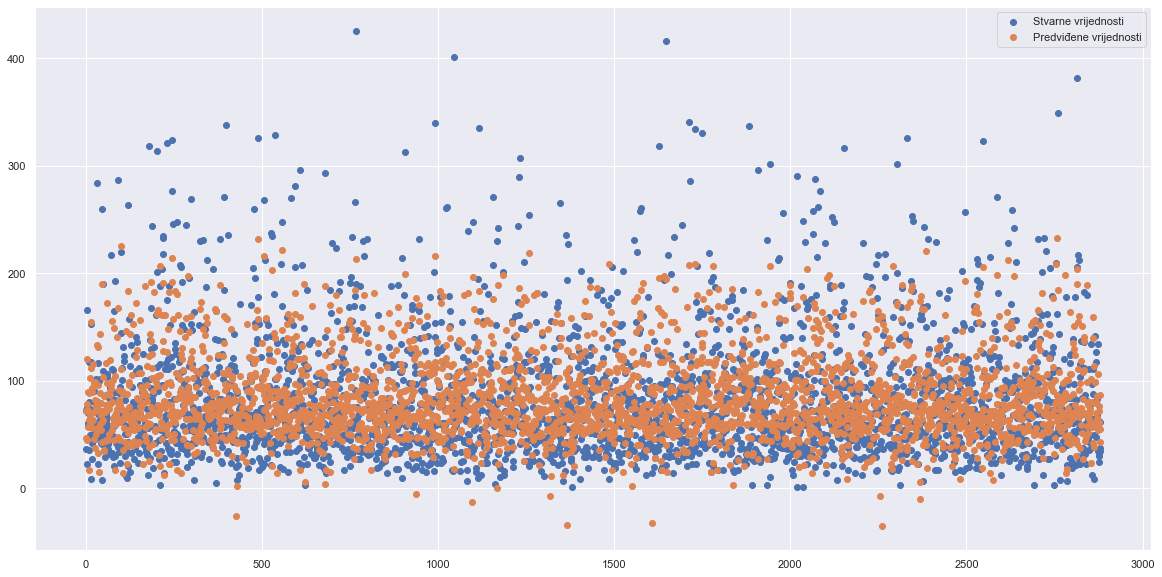

In [120]:
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted,label="Predviđene vrijednosti")
plt.legend()

Mean squared error:  1469.392111571251
Mean absolute error:  28.577635356421073
Root mean squared error:  38.33265072456184
R2 score:  0.5605087154051455
R2 adjusted score:  0.5508246274202614
        y  y_pred
0   37.00   33.14
1   73.00   56.74
2   23.00   31.62
3  166.00  118.72
4   75.00  -16.73
5   59.00   61.68
6   61.00   68.96
7   70.00   77.15
8   80.00   68.61
9   36.00   23.70
10 118.00  113.70
11  50.00   65.09
12  74.00  116.81
13  59.00   67.12
14 118.00  107.20
15   9.00   54.08
16 153.00  151.20
17  61.00   78.67
18  42.00   50.10
19  27.00   87.11
koeficijenti:  [-8.66583576e+01 -1.13422879e+02  1.59543873e+01 -9.40683046e+01
 -4.57392875e+01  1.69598243e+03 -8.91960279e+02  1.82023464e+02
 -1.47091572e+03 -6.44522115e+00 -1.18705228e+02  5.29816724e+02
 -1.36183149e+02 -1.82383605e+00 -6.31210708e+00 -3.73648060e-01
  8.91990188e-01  5.94253794e+00  1.24170437e+03 -6.51237238e+02
  5.54858197e+00 -1.24311928e+03 -3.78125574e-01  1.23181940e+00
  4.63583193e+00 -1.0381

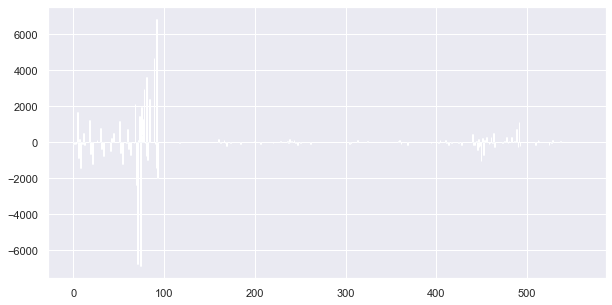

In [77]:
poly = PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

-Rezultati su sve bolji i dobijena je srednja apsolutna greška od 28.8 ug/m3 i obučen model pokriva oko 55.5% udela ukupne varijanse.

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17524140.685678966, tolerance: 8450.010550433877
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1466.4155430300752
Mean absolute error:  28.58423143566383
Root mean squared error:  38.29380554384841
R2 score:  0.5613989991636767
R2 adjusted score:  0.5517345283738346
        y  y_pred
0   37.00   40.35
1   73.00   59.62
2   23.00   30.66
3  166.00  101.97
4   75.00   -8.35
5   59.00   61.51
6   61.00   73.46
7   70.00   79.73
8   80.00   68.71
9   36.00   16.89
10 118.00  111.85
11  50.00   65.40
12  74.00  113.50
13  59.00   66.91
14 118.00  106.86
15   9.00   56.12
16 153.00  148.47
17  61.00   78.53
18  42.00   49.59
19  27.00   90.10
koeficijenti:  [ 8.08043761e+00 -2.37100733e+01 -2.13004102e+01 -1.28023019e+00
 -0.00000000e+00  1.77240190e+01  3.40991534e+00 -9.46150517e+00
  0.00000000e+00  2.72760118e-01 -4.50835272e+00 -2.10720311e+00
  2.88935894e+00 -1.69286174e+00 -7.62056356e+00 -4.66330806e-01
  7.89550530e-01  5.74732813e+00 -4.05837534e+00  4.50355371e-01
  6.16035721e+00 -2.90526356e+00 -2.68021243e-01  1.10821092e+00
  2.10168380e+00  0.0000

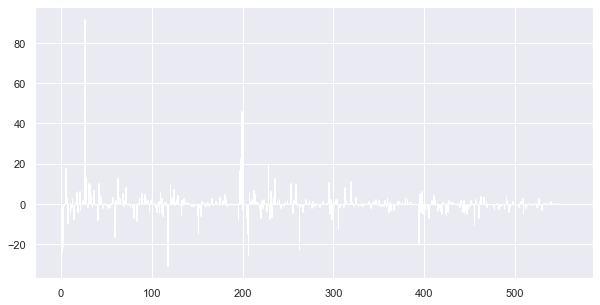

In [80]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

Mean squared error:  1484.3246983783417
Mean absolute error:  28.761609040369812
Root mean squared error:  38.526934712981536
R2 score:  0.5560424182837087
R2 adjusted score:  0.5462599164831092
        y  y_pred
0   37.00   41.67
1   73.00   60.44
2   23.00   34.31
3  166.00  101.50
4   75.00   17.43
5   59.00   59.50
6   61.00   74.64
7   70.00   80.35
8   80.00   69.39
9   36.00   19.21
10 118.00  107.97
11  50.00   65.29
12  74.00  103.64
13  59.00   70.98
14 118.00  101.64
15   9.00   52.70
16 153.00  146.52
17  61.00   80.70
18  42.00   46.90
19  27.00   87.72


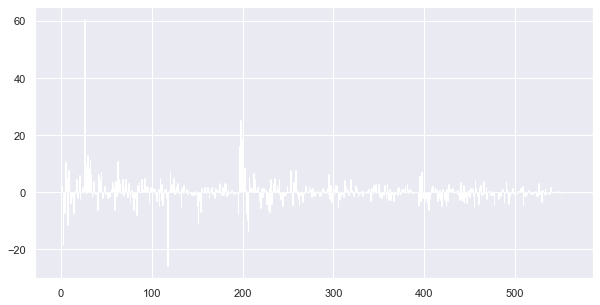

koeficijenti:  [ 3.41010514e+00  2.25438913e+00 -1.85344806e+01 -1.27882517e+00
 -7.42660149e+00  1.04055194e+01  4.82220694e+00 -1.15163529e+01
  7.77405736e+00  4.35639073e-01 -4.04794411e+00 -3.93979108e+00
 -2.33102983e-01 -1.75109458e+00 -7.29605410e+00 -5.56256035e-01
  7.31315555e-01  4.66949411e+00 -2.20450939e+00  3.47427057e-01
  6.00198807e+00 -2.35422092e+00 -2.47499057e-01  1.13165819e+00
  1.73342048e+00  9.54952123e-01  6.06255845e+01  9.79158215e+00
 -2.98008504e-01  1.31528087e+01  8.57793431e+00  4.78570255e+00
  1.15003598e+01  6.28625613e+00 -1.85852537e+00 -7.99489407e-01
  3.73633484e+00  3.07116579e-01 -5.20539333e-01 -4.48426121e-01
 -6.23745825e+00  6.25122707e+00  2.02007368e+00  4.64986202e+00
  7.04109361e+00 -7.39657944e-02 -2.08650302e+00  5.48020697e-01
  2.19732112e+00 -7.19209444e-01 -1.99696037e-01 -1.89519969e+00
  9.42131511e-02 -1.56575531e+00 -1.28161092e+00  1.08165536e+00
  1.93469933e+00  3.44469648e+00  1.86634996e+00 -6.32032881e+00
  3.728902

In [82]:
ridge_model = Ridge(alpha=100)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

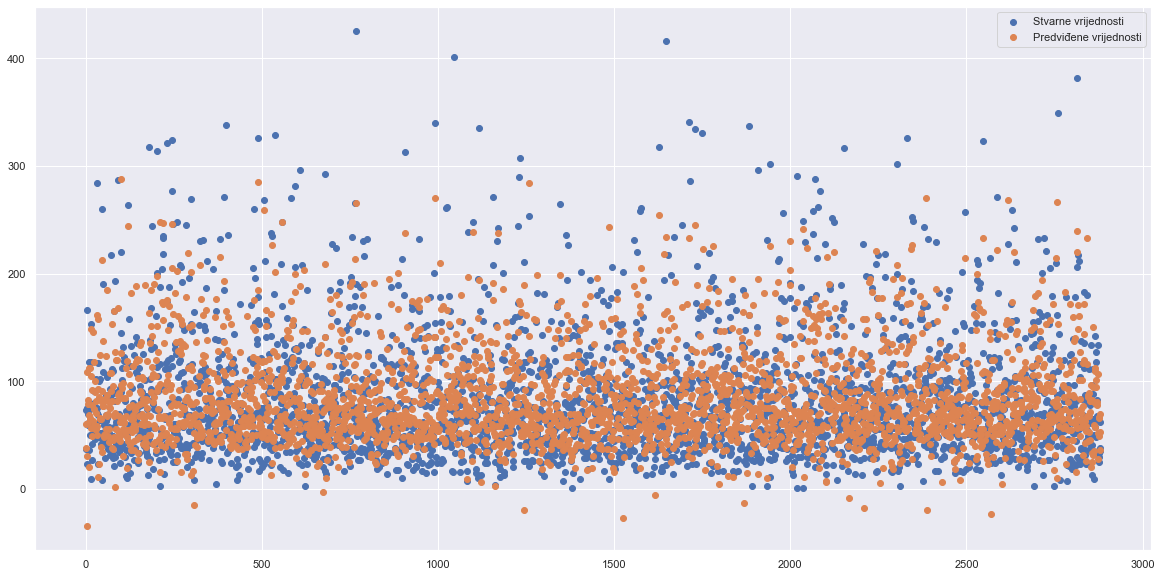

In [126]:
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted,label="Predviđene vrijednosti")
plt.legend()

-Uočava se bolje preklapanje predviđenih sa stvarnim vrijednostima, iako se ektremno visoke vrijednosti ne dobijaju u predviđenim rezultatima, a za donje granice previše odtupaju, tome može biti razlog postojanja autlajera sa velikim odtupanjima

Mean squared error:  16190.275932395305
Mean absolute error:  29.568561060070287
Root mean squared error:  127.2410151342534
R2 score:  -3.8424686041527982
R2 adjusted score:  -4.331671237355036
        y  y_pred
0   37.00   43.14
1   73.00   57.98
2   23.00   20.38
3  166.00  203.12
4   75.00   45.16
5   59.00   48.80
6   61.00   65.96
7   70.00   76.29
8   80.00   64.35
9   36.00   52.32
10 118.00  116.49
11  50.00   53.93
12  74.00  101.93
13  59.00   65.07
14 118.00  109.27
15   9.00   33.84
16 153.00  141.94
17  61.00   81.34
18  42.00   33.07
19  27.00   70.28
koeficijenti:  [ 4.93112650e+12  1.78584032e+11  1.16083699e+02 ...  1.00200462e-01
 -2.94245774e-01  2.21647817e-01]


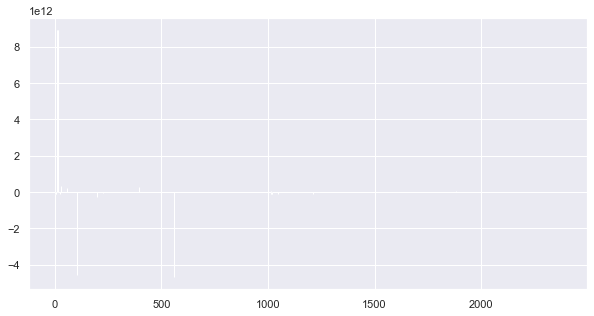

In [83]:
poly = PolynomialFeatures(degree=4,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

-DObijeni su lošiji rezultati pa se kao konačan model bira prethodni sa 3. stepenom